In [54]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, callbacks
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [55]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [56]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [57]:
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

In [58]:
#model_var1- c оптимизатором ADAM даёт лучший результат - 91%+
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [48]:
#model_var2
from keras.optimizers import SGD

model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [41]:
#model_var_a
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
#model_var_b
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 13, 13, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 flatten_10 (Flatten)        (None, 3872)              0         
                                                                 
 dense_27 (Dense)            (None, 32)                123936    
                                                                 
 dense_28 (Dense)            (None, 10)                330       
                                                     

In [60]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=1, min_delta=0.001, verbose=1, mode='auto')

In [82]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

Epoch 1/20
938/938 [==============================] - 29s 30ms/step - loss: 0.5262 - accuracy: 0.8103 - val_loss: 0.3829 - val_accuracy: 0.8680
Epoch 2/20
938/938 [==============================] - 29s 31ms/step - loss: 0.3454 - accuracy: 0.8765 - val_loss: 0.3399 - val_accuracy: 0.8797
Epoch 3/20
938/938 [==============================] - 29s 31ms/step - loss: 0.2922 - accuracy: 0.8950 - val_loss: 0.3111 - val_accuracy: 0.8865
Epoch 4/20
938/938 [==============================] - 28s 30ms/step - loss: 0.2613 - accuracy: 0.9061 - val_loss: 0.2875 - val_accuracy: 0.8947
Epoch 5/20
938/938 [==============================] - 28s 30ms/step - loss: 0.2393 - accuracy: 0.9133 - val_loss: 0.2723 - val_accuracy: 0.9015
Epoch 6/20
938/938 [==============================] - 28s 30ms/step - loss: 0.2192 - accuracy: 0.9198 - val_loss: 0.2709 - val_accuracy: 0.9029
Epoch 7/20
938/938 [==============================] - 29s 30ms/step - loss: 0.2029 - accuracy: 0.9261 - val_loss: 0.2510 - val_accuracy:

In [61]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128,
                                      validation_data=(test_images, test_labels),
                                      callbacks=[callbacks.EarlyStopping(patience=1)])

Epoch 1/10
469/469 [==============================] - 25s 52ms/step - loss: 0.7174 - accuracy: 0.7359 - val_loss: 0.5067 - val_accuracy: 0.8172
Epoch 2/10
469/469 [==============================] - 25s 53ms/step - loss: 0.4344 - accuracy: 0.8453 - val_loss: 0.4015 - val_accuracy: 0.8582
Epoch 3/10
469/469 [==============================] - 24s 52ms/step - loss: 0.3645 - accuracy: 0.8699 - val_loss: 0.3757 - val_accuracy: 0.8668
Epoch 4/10
469/469 [==============================] - 23s 49ms/step - loss: 0.3276 - accuracy: 0.8811 - val_loss: 0.3405 - val_accuracy: 0.8807
Epoch 5/10
469/469 [==============================] - 24s 51ms/step - loss: 0.2996 - accuracy: 0.8909 - val_loss: 0.3167 - val_accuracy: 0.8874
Epoch 6/10
469/469 [==============================] - 24s 52ms/step - loss: 0.2817 - accuracy: 0.8980 - val_loss: 0.3239 - val_accuracy: 0.8824


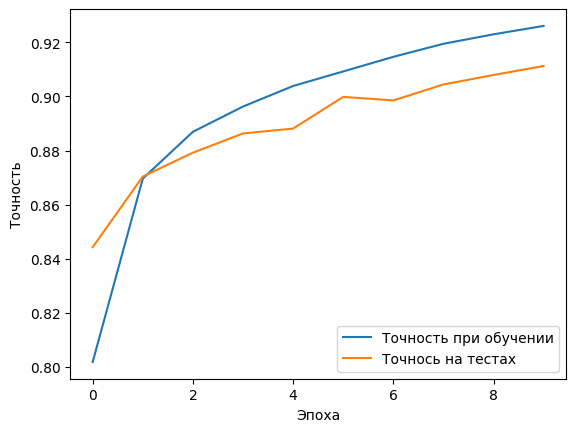

In [44]:
plt.plot(history.history['accuracy'], label='Точность при обучении')
plt.plot(history.history['val_accuracy'], label='Точнось на тестах')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.show()

In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Производительность модели: {test_acc}')

313/313 [==============================] - 2s 7ms/step - loss: 0.2581 - accuracy: 0.9112
Производительность модели: 0.9111999869346619


In [5]:
#model1_var1
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [36]:
#model1_var2
from keras.regularizers import l2
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='sigmoid'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='sigmoid'),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dense(10, activation='softmax')
])

In [37]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history1 = model1.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels),
                    callbacks=[callbacks.EarlyStopping(patience=1)])

Epoch 1/10
938/938 [==============================] - 68s 71ms/step - loss: 2.3530 - accuracy: 0.1001 - val_loss: 2.3078 - val_accuracy: 0.1000
Epoch 2/10
938/938 [==============================] - 67s 72ms/step - loss: 1.0195 - accuracy: 0.6199 - val_loss: 0.7063 - val_accuracy: 0.7502
Epoch 3/10
938/938 [==============================] - 64s 68ms/step - loss: 0.6357 - accuracy: 0.7677 - val_loss: 0.6164 - val_accuracy: 0.7796
Epoch 4/10
938/938 [==============================] - 66s 70ms/step - loss: 0.5665 - accuracy: 0.7953 - val_loss: 0.5815 - val_accuracy: 0.7903
Epoch 5/10
938/938 [==============================] - 64s 69ms/step - loss: 0.5228 - accuracy: 0.8157 - val_loss: 0.5277 - val_accuracy: 0.8127
Epoch 6/10
938/938 [==============================] - 66s 70ms/step - loss: 0.4901 - accuracy: 0.8292 - val_loss: 0.5060 - val_accuracy: 0.8147
Epoch 7/10
938/938 [==============================] - 64s 69ms/step - loss: 0.4576 - accuracy: 0.8420 - val_loss: 0.4667 - val_accuracy:

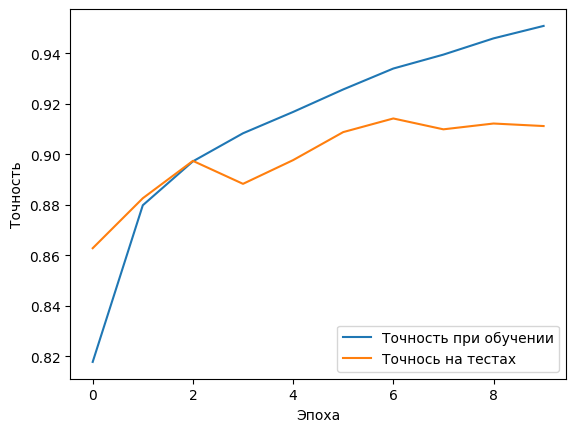

In [16]:
plt.plot(history1.history['accuracy'], label='Точность при обучении')
plt.plot(history1.history['val_accuracy'], label='Точнось на тестах')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.show()

In [11]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print(f'Производительность модели: {test_acc}')

313/313 [==============================] - 3s 11ms/step - loss: 0.2607 - accuracy: 0.9112
Производительность модели: 0.9111999869346619


In [22]:
#model2_var1
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='tanh'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [27]:
#model2_var2
from keras.optimizers import SGD
from keras.regularizers import l1

model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='tanh'),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l1(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=l1(0.01)),
    layers.Dense(10, activation='softmax')
])

Epoch 1/10
938/938 [==============================] - 68s 72ms/step - loss: 18.3033 - accuracy: 0.5231 - val_loss: 3.5842 - val_accuracy: 0.5397
Epoch 2/10
938/938 [==============================] - 65s 69ms/step - loss: 2.2486 - accuracy: 0.5964 - val_loss: 1.5884 - val_accuracy: 0.6265
Epoch 3/10
938/938 [==============================] - 64s 68ms/step - loss: 1.4412 - accuracy: 0.6608 - val_loss: 1.3588 - val_accuracy: 0.6652
Epoch 4/10
938/938 [==============================] - 64s 68ms/step - loss: 1.2726 - accuracy: 0.7056 - val_loss: 1.2402 - val_accuracy: 0.6962
Epoch 5/10
938/938 [==============================] - 64s 68ms/step - loss: 1.1757 - accuracy: 0.7237 - val_loss: 1.1587 - val_accuracy: 0.7305
Epoch 6/10
938/938 [==============================] - 63s 67ms/step - loss: 1.1129 - accuracy: 0.7364 - val_loss: 1.1279 - val_accuracy: 0.7339
Epoch 7/10
938/938 [==============================] - 64s 68ms/step - loss: 1.0688 - accuracy: 0.7456 - val_loss: 1.1212 - val_accuracy

In [23]:
#model2_var_a
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#model2_var_b
model2.compile(optimizer=SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history2 = model2.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels),
                    callbacks=[callbacks.EarlyStopping(patience=0.1)])

Epoch 1/10
938/938 [==============================] - 68s 71ms/step - loss: 0.4982 - accuracy: 0.8171 - val_loss: 0.3817 - val_accuracy: 0.8588
Epoch 2/10
938/938 [==============================] - 65s 70ms/step - loss: 0.3272 - accuracy: 0.8805 - val_loss: 0.3178 - val_accuracy: 0.8824
Epoch 3/10
938/938 [==============================] - 71s 75ms/step - loss: 0.2833 - accuracy: 0.8955 - val_loss: 0.3042 - val_accuracy: 0.8889
Epoch 4/10
938/938 [==============================] - 77s 82ms/step - loss: 0.2528 - accuracy: 0.9061 - val_loss: 0.3091 - val_accuracy: 0.8886


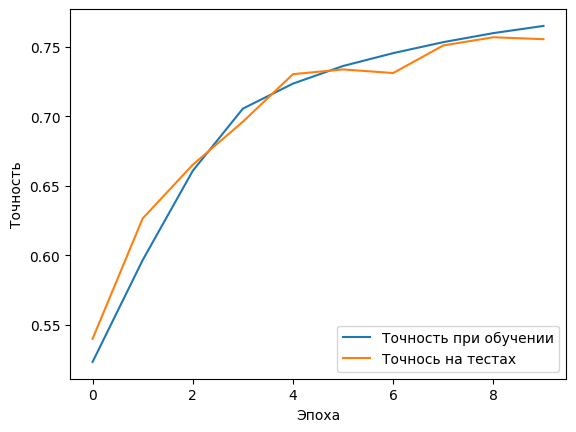

In [28]:
plt.plot(history2.history['accuracy'], label='Точность при обучении')
plt.plot(history2.history['val_accuracy'], label='Точнось на тестах')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.show()

In [29]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f'Производительность модели: {test_acc}')

313/313 [==============================] - 8s 26ms/step - loss: 0.9725 - accuracy: 0.7557
Производительность модели: 0.7556999921798706


In [17]:
#model3_var1
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [33]:
#model3_var2
from keras.optimizers import RMSprop
from keras.layers import Dropout

model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    Dropout(0.5),
    layers.Dense(64, activation='relu'),
    Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [34]:
#model3_var_a
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#model3_var_b
model3.compile(optimizer=RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history3 = model3.fit(train_images, train_labels, epochs=5, batch_size=128,
                    validation_data=(test_images, test_labels),
                    callbacks=[callbacks.EarlyStopping(patience=2)])

Epoch 1/5
469/469 [==============================] - 71s 148ms/step - loss: 0.9057 - accuracy: 0.6707 - val_loss: 0.5120 - val_accuracy: 0.7980
Epoch 2/5
469/469 [==============================] - 63s 134ms/step - loss: 0.5362 - accuracy: 0.8082 - val_loss: 0.4209 - val_accuracy: 0.8449
Epoch 3/5
469/469 [==============================] - 66s 140ms/step - loss: 0.4504 - accuracy: 0.8418 - val_loss: 0.3760 - val_accuracy: 0.8646
Epoch 4/5
469/469 [==============================] - 57s 121ms/step - loss: 0.3910 - accuracy: 0.8661 - val_loss: 0.3301 - val_accuracy: 0.8837
Epoch 5/5
469/469 [==============================] - 62s 132ms/step - loss: 0.3519 - accuracy: 0.8805 - val_loss: 0.3123 - val_accuracy: 0.8902


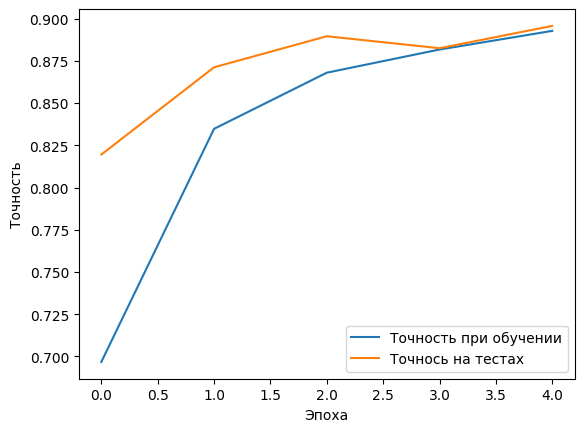

In [31]:
plt.plot(history3.history['accuracy'], label='Точность при обучении')
plt.plot(history3.history['val_accuracy'], label='Точнось на тестах')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.show()

In [32]:
test_loss, test_acc = model3.evaluate(test_images, test_labels)
print(f'Производительность модели: {test_acc}')

313/313 [==============================] - 3s 11ms/step - loss: 0.2975 - accuracy: 0.8957
Производительность модели: 0.8956999778747559
